In [1]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

In [ ]:
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)

In [4]:
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [5]:
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [6]:
W3 = tf.Variable(tf.random_normal([7 * 7 * 64, 256], stddev=0.01))
L3 = tf.reshape(L2, [-1, 7 * 7 * 64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)

In [7]:
W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L3, W4)


In [8]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [9]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [10]:
for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.7})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.362
Epoch: 0002 Avg. cost = 0.106
Epoch: 0003 Avg. cost = 0.075
Epoch: 0004 Avg. cost = 0.061
Epoch: 0005 Avg. cost = 0.050
Epoch: 0006 Avg. cost = 0.043
Epoch: 0007 Avg. cost = 0.036
Epoch: 0008 Avg. cost = 0.034
Epoch: 0009 Avg. cost = 0.030
Epoch: 0010 Avg. cost = 0.025
Epoch: 0011 Avg. cost = 0.024
Epoch: 0012 Avg. cost = 0.023
Epoch: 0013 Avg. cost = 0.019
Epoch: 0014 Avg. cost = 0.018
Epoch: 0015 Avg. cost = 0.017
최적화 완료!


In [17]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
incorrect_list = tf.reshape(tf.where(tf.equal(is_correct, False)),[-1])
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images.reshape(-1, 28, 28, 1),
                                   Y: mnist.test.labels,
                                   keep_prob: 1}))

정확도: 0.9903


In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
labels, wrongs = sess.run([model,incorrect_list], 
                          feed_dict={X:mnist.test.images.reshape(-1, 28, 28, 1), Y:mnist.test.labels, keep_prob: 1})

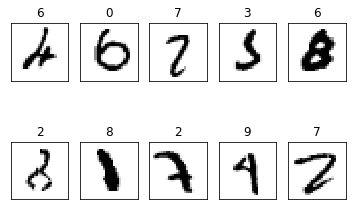

In [20]:
fig = plt.figure()
for i in range(10):
  p = wrongs[i]
  subplot = fig.add_subplot(2, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[p]))
  subplot.imshow(mnist.test.images[p].reshape([28,28]), cmap=plt.cm.gray_r)
plt.show()

Epoch: 0001 Avg. cost = 0.362
Epoch: 0002 Avg. cost = 0.106
Epoch: 0003 Avg. cost = 0.075
Epoch: 0004 Avg. cost = 0.061
Epoch: 0005 Avg. cost = 0.050
Epoch: 0006 Avg. cost = 0.043
Epoch: 0007 Avg. cost = 0.036
Epoch: 0008 Avg. cost = 0.034
Epoch: 0009 Avg. cost = 0.030
Epoch: 0010 Avg. cost = 0.025
Epoch: 0011 Avg. cost = 0.024
Epoch: 0012 Avg. cost = 0.023
Epoch: 0013 Avg. cost = 0.019
Epoch: 0014 Avg. cost = 0.018
Epoch: 0015 Avg. cost = 0.017
최적화 완료!

정확도: 0.9903